In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zengqihao","key":"77c075e2f1e6a09a98108ddcdc368b7a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle


In [2]:
!kaggle datasets download -d wildlifedatasets/seaturtleid2022


Dataset URL: https://www.kaggle.com/datasets/wildlifedatasets/seaturtleid2022
License(s): other
100% 1.64G/1.64G [01:16<00:00, 23.8MB/s]
100% 1.64G/1.64G [01:16<00:00, 23.0MB/s]


In [3]:
!unzip seaturtleid2022.zip


Streaming output truncated to the last 5000 lines.
  inflating: turtles-data/data/images/t217/JvHqeArYSk.JPG  
  inflating: turtles-data/data/images/t217/KAThYHNgIP.JPG  
  inflating: turtles-data/data/images/t217/KSOtTKQMjz.JPG  
  inflating: turtles-data/data/images/t217/KoYhgynvSp.JPG  
  inflating: turtles-data/data/images/t217/KpqGXYFZth.JPG  
  inflating: turtles-data/data/images/t217/KyvdAnjEAv.JPG  
  inflating: turtles-data/data/images/t217/LGAWMJSIJq.JPG  
  inflating: turtles-data/data/images/t217/LkbaMvGLKx.JPG  
  inflating: turtles-data/data/images/t217/MEPZlyZEoz.JPG  
  inflating: turtles-data/data/images/t217/MEyPcTKLOp.JPG  
  inflating: turtles-data/data/images/t217/MdsiRbEZQc.JPG  
  inflating: turtles-data/data/images/t217/MePRQQOVeR.JPG  
  inflating: turtles-data/data/images/t217/MprCwpdMYm.JPG  
  inflating: turtles-data/data/images/t217/NhQvIDPKSB.JPG  
  inflating: turtles-data/data/images/t217/NsCxjmKKXR.jpg  
  inflating: turtles-data/data/images/t217/NsMGqC

In [4]:
import os
print(os.getcwd())


/content


In [5]:
!ls


drive  license.txt  sample_data  seaturtleid2022.zip  turtles-data


In [28]:
!cp -r /content/turtles-data /content/drive/My\ Drive/


In [8]:
!ls /content/drive/My\ Drive/turtles-data/


data


In [9]:
import pandas as pd


metadata_splits_path = '/content/drive/MyDrive/turtles-data/data/metadata_splits.csv'


metadata_splits = pd.read_csv(metadata_splits_path)


train_data = metadata_splits[metadata_splits['split_open'] == 'train']
validation_data = metadata_splits[metadata_splits['split_open'] == 'valid']
test_data = metadata_splits[metadata_splits['split_open'] == 'test']


print(f"training size: {len(train_data)}")
print(f"vaild size: {len(validation_data)}")
print(f"test size: {len(test_data)}")


训练集大小: 5303
验证集大小: 1118
测试集大小: 2308


In [10]:
!pip install pycocotools


In [11]:
import os
import glob
import json
import pandas as pd
from pycocotools.coco import COCO
from PIL import Image
import numpy as np
import skimage.io as io
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline


In [12]:
import json


annotations_path = '/content/drive/MyDrive/turtles-data/data/annotations.json'


with open(annotations_path, 'r', encoding='utf8') as file:
    data = json.load(file)


print("Keys in annotations data:", data.keys())


if 'images' in data:
    print("First few images:")
    for img in data['images'][:10]:
        print("ID:", img['id'], "File Name:", img['file_name'])
else:
    print("'images' key is not found in the JSON data.")


Keys in annotations data: dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])
First few images:
ID: 1 File Name: images/t001/CAluWEgwPX.JPG
ID: 2 File Name: images/t001/EKyrFKHQzh.JPG
ID: 3 File Name: images/t001/ELAvEqeXxT.JPG
ID: 4 File Name: images/t001/IxRLFwTGCv.JPG
ID: 5 File Name: images/t001/LKCJAhfLBJ.JPG
ID: 6 File Name: images/t001/LZystXlIqe.JPG
ID: 7 File Name: images/t001/OiaMESWPyh.JPG
ID: 8 File Name: images/t001/VMyJozldvy.jpg
ID: 9 File Name: images/t001/XhbkFIOvZr.JPG
ID: 10 File Name: images/t001/ZKnMahXQgJ.JPG


In [13]:
import pandas as pd


metadata_splits_path = '/content/drive/MyDrive/turtles-data/data/metadata_splits.csv'


metadata_splits = pd.read_csv(metadata_splits_path)


metadata_filtered = metadata_splits[metadata_splits['split_open'].isin(['train', 'valid', 'test'])]


In [ ]:
import os
import shutil


output_dirs = ['train', 'test', 'valid']
base_path = '/content/drive/MyDrive/turtles-data/data'

for dir_name in output_dirs:
    dir_path = os.path.join(base_path, dir_name)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print(f"创建文件夹: {dir_path}")

for index, row in metadata_filtered.iterrows():
    source_file = os.path.join(base_path, row['file_name'])
    split = row['split_open']


    destination_folder = os.path.join(base_path, split)
    destination_path = os.path.join(destination_folder, os.path.basename(source_file))


    if os.path.exists(source_file):
        shutil.move(source_file, destination_path)
        print(f"已移动: {source_file} -> {destination_path}")
    else:
        print(f"源文件不存在: {source_file}")


In [15]:
import pandas as pd

# 假设你的文件路径
metadata_splits_path = '/content/drive/MyDrive/turtles-data/data/metadata_splits.csv'

# 读取 CSV 文件
metadata_splits = pd.read_csv(metadata_splits_path)

# 根据 `split_open` 列将数据集划分
train_ids = set(metadata_splits[metadata_splits['split_open'] == 'train']['id'])
valid_ids = set(metadata_splits[metadata_splits['split_open'] == 'valid']['id'])
test_ids = set(metadata_splits[metadata_splits['split_open'] == 'test']['id'])

print(f"Train IDs: {train_ids}")
print(f"Valid IDs: {valid_ids}")
print(f"Test IDs: {test_ids}")


Train IDs: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 126, 127, 128, 129, 133, 137, 138, 141, 143, 144, 145, 146, 147, 148, 149, 152, 153, 154, 155, 157, 159, 162, 163, 164, 165, 166, 167, 173, 174, 175, 176, 178, 179, 181, 182, 183, 185, 186, 187, 188, 190, 191, 194, 195, 196, 198, 199, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 2

In [17]:
def split_coco_data(data, ids, split_name):
    images = []
    for img in data['images']:
        if img['id'] in ids:
            img_copy = img.copy()
            img_copy['file_name'] = f'{split_name}/{os.path.basename(img_copy["file_name"])}'
            images.append(img_copy)

    annotations = [ann for ann in data['annotations'] if ann['image_id'] in ids]

    split_data = {
        'info': data['info'],
        'licenses': data['licenses'],
        'images': images,
        'annotations': annotations,
        'categories': data['categories']
    }

    return split_data


In [18]:
import os
import json


output_folder = '/content/drive/MyDrive/turtles-data/data/annotations'


os.makedirs(output_folder, exist_ok=True)


train_data = split_coco_data(data, train_ids, 'train')
valid_data = split_coco_data(data, valid_ids, 'valid')
test_data = split_coco_data(data, test_ids, 'test')


with open(os.path.join(output_folder, 'train.json'), 'w') as f:
    json.dump(train_data, f, indent=4)

with open(os.path.join(output_folder, 'valid.json'), 'w') as f:
    json.dump(valid_data, f, indent=4)

with open(os.path.join(output_folder, 'test.json'), 'w') as f:
    json.dump(test_data, f, indent=4)

print("数据集已成功分割并保存为 train.json, valid.json 和 test.json")


数据集已成功分割并保存为 train.json, valid.json 和 test.json


In [19]:
# Let's see first annotation
for ann in data['annotations'][:1]:
    for key, value in ann.items():
        print(key)
        print(value)
        print("********")
    print("--------------------------------")


id
1
********
image_id
1
********
category_id
3
********
segmentation
{'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}
********
area
4065.0
********
bbox
[644.0, 441.0, 70.0, 78.0]
********
iscrowd
1
********
attributes
{'orientation': 'left', 'occluded': False}
********
-------------

Using COCO API (Recommended)

In [20]:
# initialise COCO API for annotations
coco = COCO('/content/drive/MyDrive/turtles-data/data/annotations.json')

loading annotations into memory...
Done (t=5.33s)
creating index...
index created!


Example of an COCO Annotation

In [ ]:
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break

Elements of COCO Category

In [22]:
for i in range(1,4):
    print(coco.cats[i])

{'id': 1, 'name': 'turtle', 'supercategory': ''}
{'id': 2, 'name': 'flipper', 'supercategory': ''}
{'id': 3, 'name': 'head', 'supercategory': ''}


In [23]:
# you can also get all categories using coco.getCatIds
coco.getCatIds()

[1, 2, 3]

In [24]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds()) # returns dictionary

[{'id': 1, 'name': 'turtle', 'supercategory': ''},
 {'id': 2, 'name': 'flipper', 'supercategory': ''},
 {'id': 3, 'name': 'head', 'supercategory': ''}]

Elements in COCO Image

In [25]:
for key in coco.imgs.keys():
    pprint(coco.imgs[key])
    break

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t001/CAluWEgwPX.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 1,
 'identity': 't001',
 'license': 0,
 'timestamp': '2014:07:14 14:49:45',
 'width': 2000}


Important functions
loadAnns: load anns with the specified ids
loadCats: load cats with the specified ids
loadImgs: load imgs with the specified ids

In [26]:
im = coco.loadImgs(59)[0]
pprint(im)

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t003/zlkamyNHCP.jpg',
 'flickr_url': '',
 'height': 1124,
 'id': 59,
 'identity': 't003',
 'license': 0,
 'timestamp': '2010:08:23 23:19:04',
 'width': 2000}


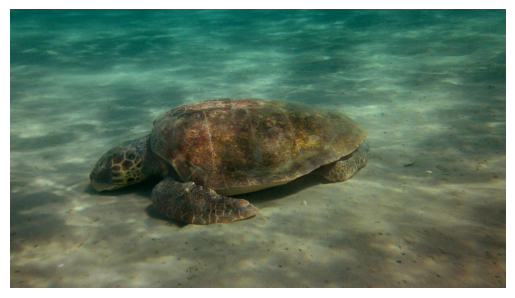

In [29]:
import os
file_path = os.path.join('/content/drive/MyDrive/turtles-data/data/', im['file_name'])
I = io.imread(file_path)
plt.axis('off')
plt.imshow(I)
plt.show()

Visualizing data and annotations

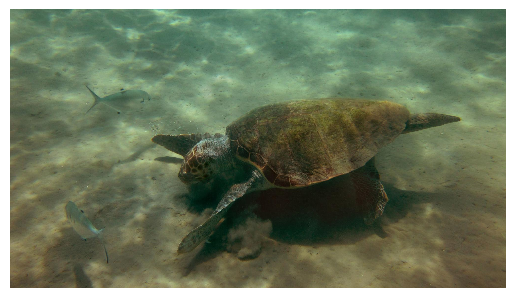

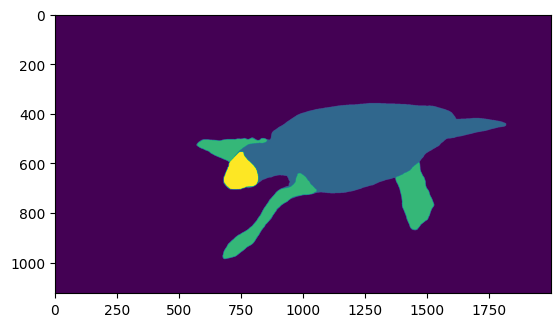

In [30]:
img_dir = 'images/'
image_id = 100
img = coco.imgs[image_id]
img

# Let's display the image
file_path = os.path.join('/content/drive/MyDrive/turtles-data/data/', img['file_name'])
image = np.array(Image.open(file_path))
plt.imshow(image, interpolation='nearest')
plt.axis('off')  # optional: hide axis for better visualization
plt.show()

# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)


In [31]:
img_dir = 'images/'
image_id = 20
img = coco.imgs[image_id]
img

{'id': 20,
 'width': 2000,
 'height': 1333,
 'file_name': 'images/t001/uUVqsYByEj.JPG',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2014:07:14 14:49:19',
 'identity': 't001'}

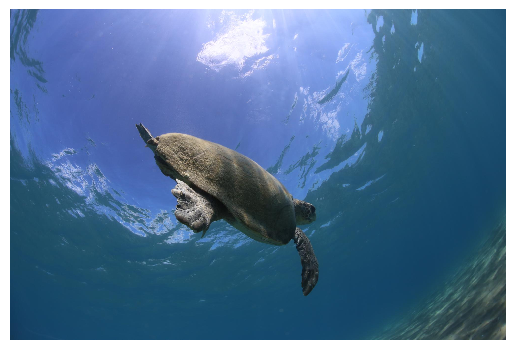

In [32]:
# Let's display the image
file_path = os.path.join('/content/drive/MyDrive/turtles-data/data/', img['file_name'])
image = np.array(Image.open(file_path))
plt.imshow(image, interpolation='nearest')
plt.axis('off')  # optional: hide axis for better visualization
plt.show()


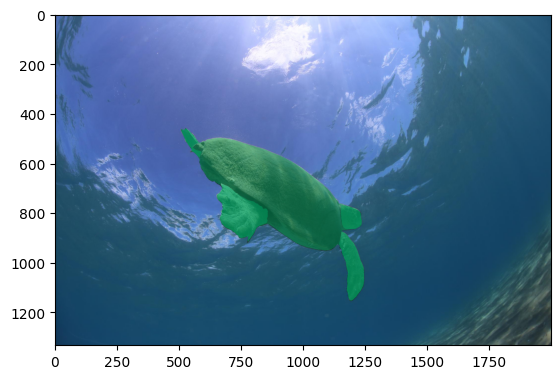

In [33]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

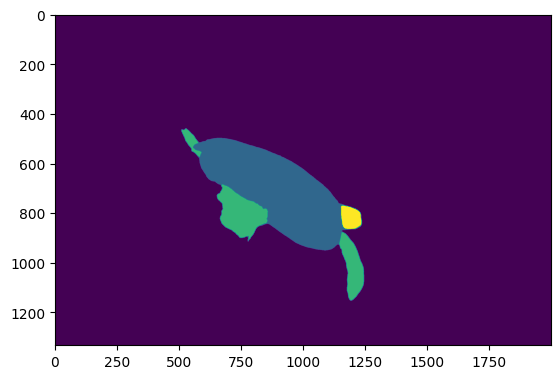

In [34]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

In [35]:
image_id = 77
img = coco.imgs[image_id]
img

{'id': 77,
 'width': 2000,
 'height': 1124,
 'file_name': 'images/t004/MzIRwubLJv.jpg',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2010:07:10',
 'identity': 't004'}

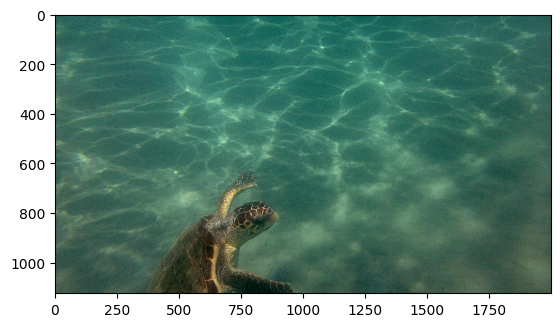

In [36]:
# Let's display the image
file_path = os.path.join('/content/drive/MyDrive/turtles-data/data/', img['file_name'])
image = np.array(Image.open(file_path))
plt.imshow(image, interpolation='nearest')
plt.show()

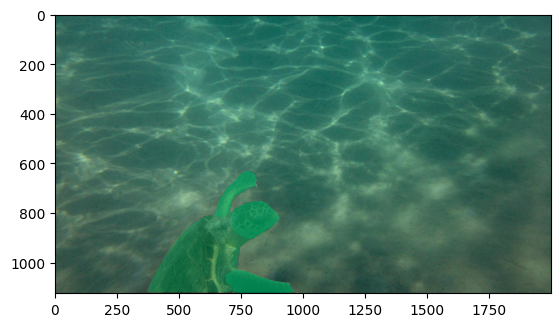

In [37]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

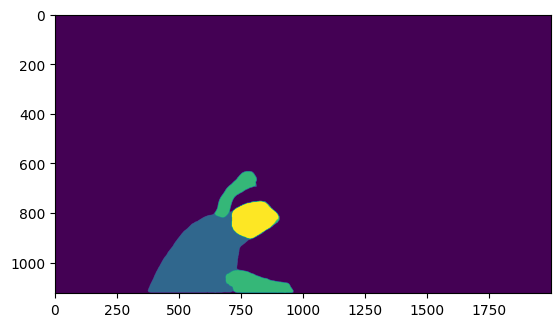

In [38]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

In [52]:
!pip install roboflow

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 45.5 MB/s eta 0:00:00


In [13]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [15]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!curl -L "https://app.roboflow.com/ds/NreK6VyZWA?key=A5Q31piJcF" > roboflow.zip
!unzip roboflow.zip -d /content/drive/MyDrive/dataset1

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset1/train/labels/YveQpkwwCK_JPG.rf.883c5dda40446bb0a2b177aaf47a0fe6.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/YwgrkRxGfp_JPG.rf.c50e1789c102301877b40d56ff327535.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/YwobYjaFXQ_jpeg.rf.1b96a266f251befb0dd1271d3ba27687.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/YzNxqCaqHs_jpg.rf.71a5c9958a0c696427d5a6eb4f3626e1.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/ZAbXAEdhYa_JPG.rf.b2a24c2855d9973e4ab4321409f2ecdd.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/ZCOHVWbtdl_jpeg.rf.74597b4c3cb013094f0a48596b64553b.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/ZCpLbxprGL_JPG.rf.c4a156283468b04733a6c80b76ab228a.txt  
  inflating: /content/drive/MyDrive/dataset1/train/labels/ZCqcNbODBU_jpeg.rf.ceccf2fb1e3de1ef6ea0b9dc63527af6.txt  
  inflating: /content/driv

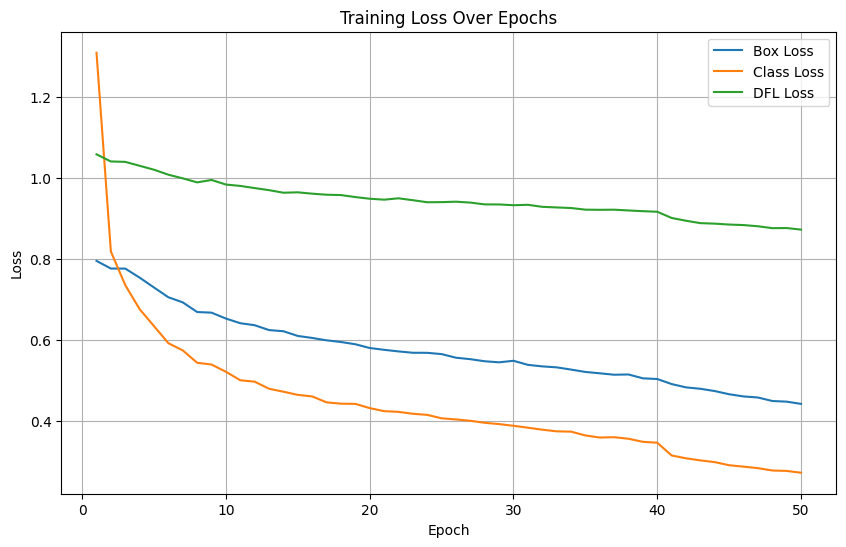

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


results_path = '/content/runs/segment/yolov8_experiment/results.csv'
df = pd.read_csv(results_path)


if {'train/box_loss', 'train/cls_loss', 'train/dfl_loss'}.issubset(df.columns):

    plt.figure(figsize=(10, 6))

    plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
    plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
    plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("The results.csv file does not contain the required columns.")

In [36]:
df = pd.read_csv(results_path)
print("Columns in CSV file:", df.columns)

Columns in CSV file: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [32]:
import glob
import os

output_dir = "/content/drive/MyDrive/segmentation_results"
os.makedirs(output_dir, exist_ok=True)


image_paths = glob.glob("/content/drive/MyDrive/dataset/valid/images/*.jpg")


for image_path in image_paths:
    results = model(image_path, task='segment')

    for i, result in enumerate(results):
        # 使用 result.plot() 方法来绘制分割结果
        image_save_path = os.path.join(output_dir, f"result_{os.path.basename(image_path)}")
        result.plot(save=True, filename=image_save_path)

print(f"Segmentation results saved in {output_dir}")


image 1/1 /content/drive/MyDrive/dataset/valid/images/ABZIHuoAbI_JPG.rf.325a74492e3a580d5084aad99c187bf5.jpg: 640x640 2 flippers, 1 head, 1 turtle, 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/valid/images/AFptGlHiEf_jpg.rf.85494db468e6a281d77dfd01f5d1bae8.jpg: 640x640 4 flippers, 1 head, 1 turtle, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/valid/images/AGSyRUClGX_JPG.rf.71c5cbe08dceb362b94f6615e342dd1a.jpg: 640x640 2 flippers, 1 head, 1 turtle, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/valid/images/AKFTMYBads_jpg.rf.86437362369933022c3b7145101a7084.jpg: 640x640 1 flipper, 1 head, 1 turtle, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 64

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [9]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt')


model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    batch=16,
    imgsz=640,
    task='segment',
    name='yolov8_experiment_segment'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 300MB/s]

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_experiment_segment, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, 

100%|██████████| 755k/755k [00:00<00:00, 129MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 220MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 5311 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5311/5311 [00:05<00:00, 967.81it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 1111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1111/1111 [00:01<00:00, 578.12it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/segment/yolov8_experiment_segment/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/yolov8_experiment_segment
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.96G     0.8032       1.65      1.318      1.049        136        640: 100%|██████████| 332/332 [02:41<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]


                   all       1111       4866      0.896      0.851       0.91        0.7       0.88      0.831      0.882      0.614

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.91G     0.7892      1.406     0.8303      1.035        132        640: 100%|██████████| 332/332 [02:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]


                   all       1111       4866      0.908      0.856      0.913      0.703      0.892      0.839      0.885      0.617

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.89G      0.789      1.381     0.7482      1.037        108        640: 100%|██████████| 332/332 [02:33<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


                   all       1111       4866      0.906       0.87      0.919      0.715      0.904      0.867      0.916      0.684

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.91G     0.7595      1.331     0.6739      1.021        120        640: 100%|██████████| 332/332 [02:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]


                   all       1111       4866      0.942      0.879      0.943      0.745      0.936      0.872      0.933        0.7

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.95G     0.7332      1.278     0.6328       1.01        100        640: 100%|██████████| 332/332 [02:31<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.19it/s]

                   all       1111       4866      0.938      0.913      0.955      0.777      0.937      0.911      0.953      0.746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.96G     0.7103      1.251     0.5966     0.9992        115        640: 100%|██████████| 332/332 [02:25<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.23it/s]

                   all       1111       4866      0.945      0.915      0.957       0.79      0.945      0.914      0.954       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.91G     0.6976      1.216     0.5818     0.9932         76        640: 100%|██████████| 332/332 [02:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]

                   all       1111       4866      0.956      0.917      0.961      0.802      0.955      0.915      0.959      0.763



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.96G     0.6741      1.168     0.5497     0.9819        106        640: 100%|██████████| 332/332 [02:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]

                   all       1111       4866      0.943      0.916      0.957      0.794       0.94      0.912      0.951      0.755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.95G     0.6738      1.166     0.5419      0.988        110        640: 100%|██████████| 332/332 [02:25<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.21it/s]

                   all       1111       4866       0.95      0.931      0.965      0.813       0.95      0.931      0.964      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.91G     0.6563      1.147     0.5242     0.9766        109        640: 100%|██████████| 332/332 [02:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]

                   all       1111       4866       0.95      0.932      0.966      0.814      0.952      0.929      0.965      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.92G     0.6497      1.137     0.5088     0.9744         80        640: 100%|██████████| 332/332 [02:27<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]

                   all       1111       4866      0.954      0.925      0.965      0.809      0.948      0.923       0.96      0.765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.89G     0.6405      1.114      0.505     0.9684        154        640: 100%|██████████| 332/332 [02:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]

                   all       1111       4866      0.953      0.936      0.969      0.821       0.95      0.936      0.968      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.95G     0.6287      1.084      0.487     0.9617        127        640: 100%|██████████| 332/332 [02:28<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]

                   all       1111       4866      0.959       0.93      0.969       0.83      0.958      0.926      0.969      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.85G     0.6274      1.084     0.4825     0.9581        119        640: 100%|██████████| 332/332 [02:31<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]

                   all       1111       4866      0.953      0.943      0.972      0.835       0.95      0.942      0.971      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.91G     0.6126       1.07     0.4715     0.9563        130        640: 100%|██████████| 332/332 [02:25<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.22it/s]

                   all       1111       4866      0.957       0.94      0.972       0.83      0.959      0.937      0.971      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.97G     0.6112       1.07     0.4661     0.9539        106        640: 100%|██████████| 332/332 [02:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]

                   all       1111       4866      0.956      0.945      0.973      0.839      0.956      0.944      0.973      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.95G     0.6047      1.043     0.4587     0.9509        118        640: 100%|██████████| 332/332 [02:31<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.76it/s]

                   all       1111       4866      0.959      0.942      0.973      0.836      0.958       0.94      0.971      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.92G     0.6009      1.037     0.4531     0.9501         91        640: 100%|██████████| 332/332 [02:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]

                   all       1111       4866      0.957       0.94      0.969      0.839      0.956       0.94      0.969      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.87G      0.598      1.045     0.4522     0.9462        100        640: 100%|██████████| 332/332 [02:32<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.24it/s]

                   all       1111       4866      0.965       0.95      0.974      0.844      0.963      0.948      0.975      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.95G     0.5865      1.025     0.4427     0.9433        128        640: 100%|██████████| 332/332 [02:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.18it/s]

                   all       1111       4866      0.959      0.951      0.976      0.846      0.959      0.948      0.975      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.97G     0.5835      1.019     0.4353     0.9424        109        640: 100%|██████████| 332/332 [02:34<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.29it/s]

                   all       1111       4866      0.966      0.947      0.976      0.849      0.966      0.945      0.975      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.99G     0.5779      1.027      0.432     0.9426        139        640: 100%|██████████| 332/332 [02:26<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.22it/s]

                   all       1111       4866      0.965      0.948      0.975      0.848      0.964      0.947      0.975      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.01G     0.5704     0.9836     0.4258     0.9374        135        640: 100%|██████████| 332/332 [02:31<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]

                   all       1111       4866      0.967      0.948      0.976      0.859      0.965      0.946      0.976      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.97G     0.5727      1.004      0.423     0.9356        112        640: 100%|██████████| 332/332 [02:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]

                   all       1111       4866      0.969       0.95      0.978      0.853      0.968      0.947      0.976      0.805



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.93G     0.5684      0.992      0.415     0.9338        114        640: 100%|██████████| 332/332 [02:30<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]

                   all       1111       4866      0.965      0.951      0.979      0.858      0.964      0.949      0.977      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.9G     0.5644     0.9965     0.4153     0.9368        104        640: 100%|██████████| 332/332 [02:28<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.28it/s]

                   all       1111       4866      0.964      0.952      0.979       0.86      0.963       0.95      0.977      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.93G     0.5567     0.9698     0.4083     0.9326        111        640: 100%|██████████| 332/332 [02:25<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.17it/s]

                   all       1111       4866      0.967      0.951      0.978      0.859      0.966      0.947      0.976       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.89G     0.5544     0.9822     0.4079     0.9295         79        640: 100%|██████████| 332/332 [02:31<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]

                   all       1111       4866       0.97      0.951      0.979      0.865      0.967      0.949      0.979      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.92G     0.5501     0.9688     0.4004     0.9281        103        640: 100%|██████████| 332/332 [02:32<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]

                   all       1111       4866      0.965      0.955      0.978      0.866      0.963       0.95      0.976      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.95G     0.5519     0.9536     0.3974     0.9263         98        640: 100%|██████████| 332/332 [02:31<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]

                   all       1111       4866      0.963      0.957      0.978      0.866      0.962      0.954      0.977      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.92G     0.5438      0.953     0.3928     0.9275        130        640: 100%|██████████| 332/332 [02:30<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]

                   all       1111       4866       0.97      0.955       0.98      0.868      0.969      0.953      0.979      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.97G     0.5379     0.9377      0.386     0.9227        121        640: 100%|██████████| 332/332 [02:32<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]

                   all       1111       4866      0.965      0.961      0.979      0.871      0.964       0.96      0.978      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.95G     0.5344     0.9322      0.382     0.9227        119        640: 100%|██████████| 332/332 [02:32<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]

                   all       1111       4866      0.971      0.956      0.981      0.869      0.968      0.953      0.979      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G     0.5303     0.9295      0.381     0.9196        117        640: 100%|██████████| 332/332 [02:33<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.11it/s]

                   all       1111       4866      0.975      0.954      0.982      0.874      0.966      0.956      0.981      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.95G     0.5253     0.9143     0.3739     0.9167        114        640: 100%|██████████| 332/332 [02:33<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]

                   all       1111       4866      0.971       0.96      0.981      0.874      0.967      0.958       0.98      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.96G     0.5192     0.9094     0.3672     0.9146        155        640: 100%|██████████| 332/332 [02:32<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.08it/s]

                   all       1111       4866      0.972      0.961      0.982      0.873       0.97      0.957      0.981      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.92G     0.5201     0.9218     0.3712     0.9164        117        640: 100%|██████████| 332/332 [02:31<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]

                   all       1111       4866      0.969       0.96      0.981      0.875      0.968      0.959       0.98      0.827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.92G     0.5191     0.9077     0.3664     0.9144        114        640: 100%|██████████| 332/332 [02:34<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]

                   all       1111       4866      0.971       0.96      0.982      0.877      0.969      0.957      0.981      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.93G     0.5124     0.9037     0.3613     0.9148        136        640: 100%|██████████| 332/332 [02:31<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.14it/s]

                   all       1111       4866      0.973      0.958      0.982      0.879      0.972      0.954      0.981      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.04G     0.5078     0.8954     0.3573     0.9107        113        640: 100%|██████████| 332/332 [02:29<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.12it/s]

                   all       1111       4866      0.969      0.964      0.982      0.879      0.968      0.961      0.982       0.83


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.81G     0.4974      0.671     0.3259     0.8945         67        640: 100%|██████████| 332/332 [02:14<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]

                   all       1111       4866       0.97      0.963      0.982      0.881      0.972      0.958      0.982      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.81G     0.4885      0.663     0.3176     0.8886         65        640: 100%|██████████| 332/332 [02:10<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.29it/s]

                   all       1111       4866      0.974      0.959      0.982      0.881      0.972      0.958      0.981      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.86G     0.4842     0.6601     0.3126     0.8825         71        640: 100%|██████████| 332/332 [02:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.15it/s]

                   all       1111       4866      0.969      0.963      0.982      0.882      0.969       0.96      0.982      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.81G     0.4772     0.6518     0.3084     0.8805         65        640: 100%|██████████| 332/332 [02:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.19it/s]

                   all       1111       4866      0.975       0.96      0.982      0.883      0.975      0.957      0.982      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.81G     0.4693     0.6407     0.3042     0.8791         61        640: 100%|██████████| 332/332 [02:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.10it/s]

                   all       1111       4866       0.97      0.967      0.983      0.886      0.968      0.963      0.983      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.81G     0.4668     0.6385     0.2985     0.8783         63        640: 100%|██████████| 332/332 [02:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.20it/s]

                   all       1111       4866       0.97      0.967      0.983      0.885      0.973       0.96      0.984       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.81G     0.4647     0.6398     0.2958     0.8741         64        640: 100%|██████████| 332/332 [02:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]

                   all       1111       4866      0.975      0.961      0.983      0.887      0.977      0.958      0.983      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.81G      0.455     0.6281     0.2896     0.8702         66        640: 100%|██████████| 332/332 [02:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]

                   all       1111       4866      0.975       0.96      0.983      0.888      0.976      0.958      0.984      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.84G     0.4507     0.6211     0.2871     0.8687         67        640: 100%|██████████| 332/332 [02:12<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]

                   all       1111       4866      0.973      0.964      0.983      0.888      0.976      0.959      0.983      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.81G     0.4466     0.6198      0.283     0.8664         67        640: 100%|██████████| 332/332 [02:11<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:16<00:00,  2.16it/s]

                   all       1111       4866      0.973      0.965      0.983      0.889      0.975       0.96      0.984       0.84



50 epochs completed in 2.284 hours.
Optimizer stripped from runs/segment/yolov8_experiment_segment/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/yolov8_experiment_segment/weights/best.pt, 6.8MB

Validating runs/segment/yolov8_experiment_segment/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.70it/s]


                   all       1111       4866      0.974      0.965      0.983      0.889      0.976       0.96      0.984       0.84
               flipper       1098       2663      0.943      0.922      0.964      0.828      0.951      0.916      0.968      0.794
                  head       1086       1086      0.986      0.979      0.993      0.865      0.983       0.97      0.991      0.836
                turtle       1108       1117      0.992      0.995      0.992      0.975      0.992      0.993      0.991       0.89
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/yolov8_experiment_segment


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794ccf29d390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04


image 1/1 /content/drive/MyDrive/dataset/valid/images/ABZIHuoAbI_JPG.rf.325a74492e3a580d5084aad99c187bf5.jpg: 640x640 2 flippers, 1 head, 1 turtle, 23.4ms
Speed: 2.6ms preprocess, 23.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


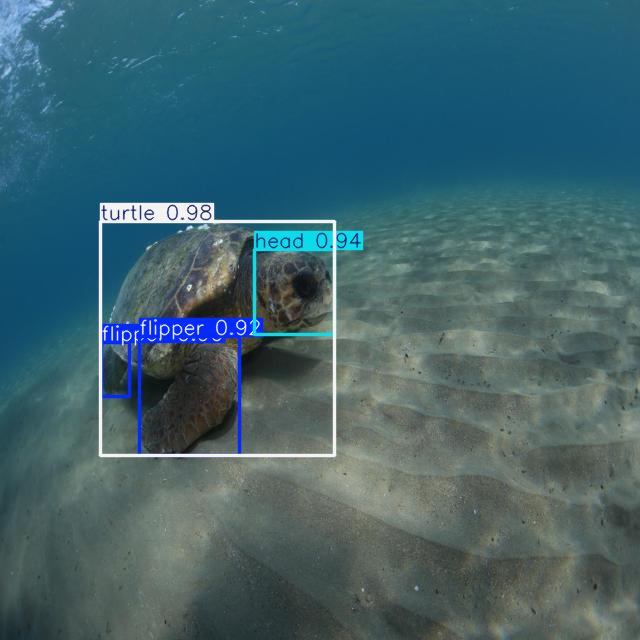

In [7]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/best.pt')


results = model('/content/drive/MyDrive/dataset/valid/images/ABZIHuoAbI_JPG.rf.325a74492e3a580d5084aad99c187bf5.jpg', task='segment')
results[0].show()

In [17]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt')


model.train(
    data='/content/drive/MyDrive/dataset1/data.yaml',
    epochs=10,
    batch=16,
    imgsz=640,
    task='segment',
    name='yolov8_experiment_segment'
)

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/dataset1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_experiment_segment5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/drive/MyDrive/dataset1/train/labels... 5311 images, 1 backgrounds, 0 corrupt: 100%|██████████| 5311/5311 [02:10<00:00, 40.60it/s]


train: New cache created: /content/drive/MyDrive/dataset1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/dataset1/valid/labels... 1111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1111/1111 [00:22<00:00, 48.99it/s]


val: New cache created: /content/drive/MyDrive/dataset1/valid/labels.cache
Plotting labels to runs/segment/yolov8_experiment_segment5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/yolov8_experiment_segment5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.11G     0.8503      1.359      1.365      1.075         62        640: 100%|██████████| 332/332 [03:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:25<00:00,  1.37it/s]


                   all       1111       4866      0.916      0.852      0.922      0.716      0.912      0.846      0.913      0.674

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.9G     0.8091      1.118     0.8013       1.04         65        640: 100%|██████████| 332/332 [03:09<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:25<00:00,  1.39it/s]


                   all       1111       4866      0.913      0.869      0.932      0.718      0.904      0.859      0.923      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.86G     0.7817      1.074     0.6701      1.029         60        640: 100%|██████████| 332/332 [03:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:26<00:00,  1.30it/s]


                   all       1111       4866      0.938      0.902      0.947      0.756      0.934      0.899      0.943       0.72

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.86G     0.7451      1.022     0.5932      1.007         64        640: 100%|██████████| 332/332 [03:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:25<00:00,  1.39it/s]


                   all       1111       4866      0.941      0.911      0.954      0.779      0.936      0.907      0.951       0.74

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.84G      0.697     0.9534       0.53     0.9847         66        640: 100%|██████████| 332/332 [03:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:27<00:00,  1.29it/s]

                   all       1111       4866      0.954      0.923       0.96        0.8      0.953      0.922      0.959       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.85G     0.6601     0.8981     0.4839     0.9631         64        640: 100%|██████████| 332/332 [03:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:23<00:00,  1.48it/s]

                   all       1111       4866       0.96      0.935      0.967      0.813      0.957      0.932      0.966       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.83G      0.627     0.8581     0.4504     0.9459         64        640: 100%|██████████| 332/332 [03:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:24<00:00,  1.43it/s]

                   all       1111       4866      0.954      0.946      0.971      0.836      0.949      0.948      0.972        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.83G     0.5946     0.8167     0.4179     0.9321         66        640: 100%|██████████| 332/332 [03:02<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:23<00:00,  1.46it/s]

                   all       1111       4866      0.965      0.942      0.974      0.848      0.964       0.94      0.974      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.83G     0.5652     0.7794     0.3918     0.9201         67        640: 100%|██████████| 332/332 [03:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:23<00:00,  1.47it/s]

                   all       1111       4866      0.963      0.951      0.976      0.855      0.961       0.95      0.975      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.88G      0.536     0.7452     0.3639     0.9044         63        640: 100%|██████████| 332/332 [02:59<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:23<00:00,  1.49it/s]

                   all       1111       4866      0.966      0.956      0.978      0.863      0.965      0.955      0.977      0.818



10 epochs completed in 0.590 hours.
Optimizer stripped from runs/segment/yolov8_experiment_segment5/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/yolov8_experiment_segment5/weights/best.pt, 6.8MB

Validating runs/segment/yolov8_experiment_segment5/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:31<00:00,  1.10it/s]


                   all       1111       4866      0.966      0.956      0.978      0.863      0.964      0.956      0.978      0.818
               flipper       1098       2663      0.929      0.908      0.951      0.793      0.929      0.908      0.955       0.77
                  head       1086       1086      0.983      0.968      0.992      0.834      0.979      0.965      0.988      0.813
                turtle       1108       1117      0.986      0.994      0.991      0.964      0.985      0.993      0.991      0.871
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/segment/yolov8_experiment_segment5


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c5291f95270>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [20]:
from ultralytics import YOLO


model = YOLO('/content/runs/segment/yolov8_experiment_segment5/weights/best.pt')


model.save('/content/drive/MyDrive/dataset/best/yolov8_segment_best.pt')


image 1/1 /content/drive/MyDrive/dataset/valid/images/AFptGlHiEf_jpg.rf.85494db468e6a281d77dfd01f5d1bae8.jpg: 640x640 4 flippers, 1 head, 1 turtle, 45.5ms
Speed: 2.5ms preprocess, 45.5ms inference, 16.5ms postprocess per image at shape (1, 3, 640, 640)


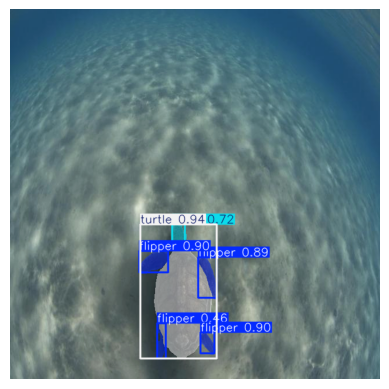

Segmentation result saved in /content/drive/MyDrive/segmentation_results/result_ABZIHuoAbI_JPG.rf.325a74492e3a580d5084aad99c187bf5.jpg


In [23]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model = YOLO('/content/drive/MyDrive/dataset/best/yolov8_segment_best.pt')


image_path = '/content/drive/MyDrive/dataset/valid/images/AFptGlHiEf_jpg.rf.85494db468e6a281d77dfd01f5d1bae8.jpg'  # 替换为你的图像路径
output_path = '/content/drive/MyDrive/segmentation_results/result_ABZIHuoAbI_JPG.rf.325a74492e3a580d5084aad99c187bf5.jpg'  # 替换为你想保存分割图的路径


results = model(image_path, task='segment')


for i, result in enumerate(results):

    segmented_image = result.plot()


    cv2.imwrite(output_path, segmented_image)


    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

print(f"Segmentation result saved in {output_path}")

In [24]:
from ultralytics import YOLO
import os
import cv2
import numpy as np


model = YOLO('/content/drive/MyDrive/dataset/best/yolov8_segment_best.pt')


input_dir = '/content/drive/MyDrive/dataset/valid/images/'
output_dir = '/content/drive/MyDrive/segmentation_results1/'


os.makedirs(output_dir, exist_ok=True)


for image_name in os.listdir(input_dir):
    image_path = os.path.join(input_dir, image_name)


    if image_name.endswith('.jpg') or image_name.endswith('.png'):


        results = model(image_path, task='segment')

        for i, result in enumerate(results):

            segmented_image = np.array(result.plot())


            output_path = os.path.join(output_dir, f"segmented_{image_name}")
            cv2.imwrite(output_path, segmented_image)

            print(f"Saved segmentation result for {image_name} to {output_path}")

print("All segmentation results have been saved.")


image 1/1 /content/drive/MyDrive/dataset/valid/images/MJufYXjieW_JPG.rf.0a90802fd25bdfbf3eb8b166a174854f.jpg: 640x640 3 flippers, 1 head, 1 turtle, 23.4ms
Speed: 2.5ms preprocess, 23.4ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)
Saved segmentation result for MJufYXjieW_JPG.rf.0a90802fd25bdfbf3eb8b166a174854f.jpg to /content/drive/MyDrive/segmentation_results1/segmented_MJufYXjieW_JPG.rf.0a90802fd25bdfbf3eb8b166a174854f.jpg

image 1/1 /content/drive/MyDrive/dataset/valid/images/pmIwtXMFFw_jpeg.rf.2d96cd51c91829002a7169b46a98fe4b.jpg: 640x640 3 flippers, 1 head, 1 turtle, 18.6ms
Speed: 3.1ms preprocess, 18.6ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)
Saved segmentation result for pmIwtXMFFw_jpeg.rf.2d96cd51c91829002a7169b46a98fe4b.jpg to /content/drive/MyDrive/segmentation_results1/segmented_pmIwtXMFFw_jpeg.rf.2d96cd51c91829002a7169b46a98fe4b.jpg

image 1/1 /content/drive/MyDrive/dataset/valid/images/MhmHIiOJWG_JPG.rf.1925c2b6a5f27d103a832e